In [416]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from numpy.ma.core import ceil
from scipy.spatial import distance
from sklearn.metrics import accuracy_score #scoring
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [417]:
meus_dados_df = pd.read_csv('meus_dados.csv')

meus_dados = meus_dados_df.to_numpy()

In [418]:
c1, c2, c3 = meus_dados[0:82, :], meus_dados[82:164, :], meus_dados[175:257, :]
data_file = np.concatenate((c1, c2, c3), axis=0)

In [420]:
#data_x = data_file[:, :24]
data_x = data_file[:, [0, 1, 2, 3, 4, 7, 8, 21]]
#teste
#data_x = data_file[:, [0, 1]]

data_y = data_file[:, 24]

In [421]:
# Carregar o conjunto de dados Iris
iris = load_iris()
#data_x = iris.data

# Obter as classes dos dados Iris
#data_y = iris.target

In [422]:
class SelfOrganizingMap:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.rand(output_dim[0], output_dim[1], input_dim)

    def train(self, data, labels, num_epochs, learning_rate):
        quantization_errors = []  # Lista para armazenar os valores de erro de quantização
        for epoch in range(num_epochs):
            data, labels = shuffle(data, labels)

            #np.random.shuffle(data)

            ## Definindo parâmetros dinamicamente
            learning_rate, neighbourhood_range = decay(epoch, num_epochs, learning_rate, max_m_dsitance=4)

            for sample in data:
                best_match = self._find_best_matching_unit(sample)

                ## Comentário temporário
                self._update_weights(sample, best_match, learning_rate)

                #### Nova Atualização

                #for row in range(self.weights.shape[0]):
                #  for col in range(self.weights.shape[1]):
                    # Aqui é feito o cálculo de vizinhaça; por exemplo, para row, col = 0, 0 e winter (neurônio vencedor) = 1, 0,
                    # É calculada a distância de Manhatan entre essas duas posições. O limite dessa distância é neighbourhood_range,
                    # valor que vai sendo reduzido com o passar das iterações.

                #    if self.m_distance([row, col], best_match) <= neighbourhood_range:
                #      print(epoch)
                #      self.weights[row][col] += learning_rate * (sample - self.weights[row][col]) #update neighbour's weight

                #### Fim

            quantization_error = self._calculate_quantization_error(data)
            quantization_errors.append(quantization_error)
        return quantization_errors

    def _find_best_matching_unit(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def _update_weights(self, sample, best_match, learning_rate):
        x, y = best_match
        self.weights[x, y] += learning_rate * (sample - self.weights[x, y])

    def get_weights(self):
        return self.weights

    def m_distance(self, x, y):
      return distance.cityblock(x,y)

    def _calculate_quantization_error(self, data):
        quantization_error = 0

        for sample in data:
            best_match = self._find_best_matching_unit(sample)
            quantization_error += np.linalg.norm(sample - self.weights[best_match])

        quantization_error /= len(data)

        return quantization_error
    def calculate_accuracy(self, data, labels):
        num_correct = 0

        for i in range(len(data)):
            sample = data[i]
            best_match = self._find_best_matching_unit(sample)
            print(best_match)
            #predicted_label = labels[best_match[0], best_match[1]]
            #true_label = labels[i]

            #if predicted_label == true_label:
                #num_correct += 1

        #accuracy = num_correct / len(data)
        #return accuracy


In [423]:
# Normalização dos Dados
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

def decay(epoch, num_epochs, max_learning_rate, max_m_dsitance):
  coefficient = 1.0 - (np.float64(epoch)/num_epochs)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range


In [424]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(196, 8) (196,) (50, 8) (50,)


In [425]:
# Normalizar os dados
data_x_normalized = minmax_scaler(data_x)
train_x_normalized = minmax_scaler(train_x)
test_x_normalized = minmax_scaler(test_x)

# Todos os Dados
X = data_x_normalized
y = data_y

# Dados de Treino
#X = train_x_normalized
#y = train_y

# Dados de Teste
#X = test_x_normalized
#y = test_y

In [458]:
# Criar e treinar o mapa auto-organizável
input_dim = X.shape[1]  # Dimensão das entradas
output_dim = (3, 3)  # Dimensão da grade do mapa
num_epochs = 1000  # Número de épocas de treinamento
learning_rate = 0.1  # Taxa de aprendizado

In [459]:
som = SelfOrganizingMap(input_dim, output_dim)

# Dados de treinamento
#quantization_errors = som.train(train_x_normalized, num_epochs, learning_rate)

# Dados de teste
quantization_errors = som.train(X, y, num_epochs, learning_rate)

weights = som.get_weights()

In [460]:
# Acurácia (Ai)
#label_data = y
#map = np.empty(shape=(output_dim[0], output_dim[1]), dtype=object)

#for row in range(output_dim[0]):
#  for col in range(output_dim[1]):
#    map[row][col] = [] # empty list to store the label

#for t in range(X.shape[0]):
#  if (t+1) % 1000 == 0:
#    print("sample data: ", t+1)

#  winner = som._find_best_matching_unit(X[t])
#  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

# construct label map
#label_map = np.zeros(shape=(output_dim[0], output_dim[1]), dtype=np.int64)

#for row in range(output_dim[0]):
#  for col in range(output_dim[1]):
#    label_list = map[row][col]
#    if len(label_list)==0:
#      label = 4
#    else:
#      label = max(label_list, key=label_list.count)
#    label_map[row][col] = label

#winner_labels = []

#for t in range(test_x_normalized.shape[0]):
#  winner = som._find_best_matching_unit(test_x_normalized[t])
#  row = winner[0]
#  col = winner[1]
#  predicted = label_map[row][col]
#  winner_labels.append(predicted)
#print(label_map)
#print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))



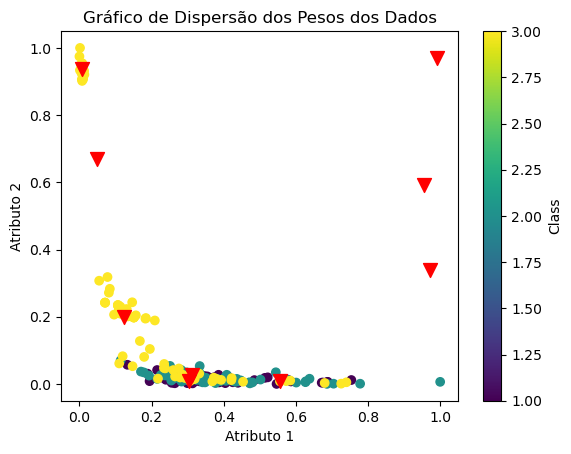

In [461]:
########### Gráfico Dispersão dos Dados ##############

weights_flat = weights.reshape(-1, input_dim)

# Cada ponto no mapa representa uma amostra. São pegos apenas os dois primeiros atributos dos dados, mas podem ser pegos outros.

# Plotar o gráfico de dispersão
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)

# plotando os neurônios em cima dos dados
plt.scatter(weights_flat[:, 0], weights_flat[:, 1], color='red', s=100, marker="v")

plt.colorbar(scatter, label='Class')

plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.title('Gráfico de Dispersão dos Pesos dos Dados')
plt.show()

KNN

Amostras

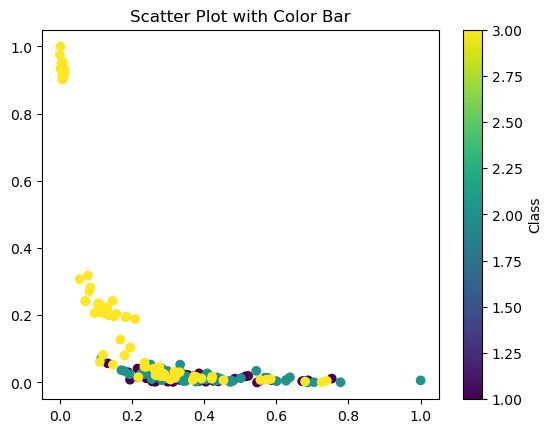

In [462]:
at1 = X[:, 0]
at2 = X[:, 1]
classes = y

# Scatter plot
scatter = plt.scatter(at1, at2, c=classes)

# Set plot title
plt.title("Scatter Plot with Color Bar")

# Add color bar
plt.colorbar(scatter, label='Class')

# Display the plot
plt.show()

In [463]:

dados = list(zip(at1, at2))

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(dados, classes)

KNeighborsClassifier(n_neighbors=2)

Neurônios

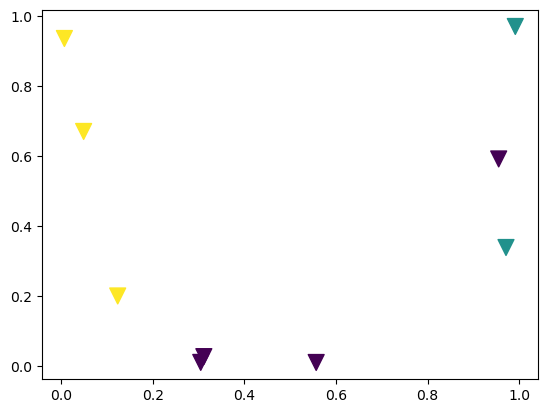

In [464]:
news_x, news_y = weights_flat[:, 0], weights_flat[:, 1]

news_points = list(zip(news_x, news_y))

#new_point = [(news_x[0], news_y[0])]


#prediction = knn.predict(new_point)
#print(at1)
#print(news_points)

prediction = []
for new_point in news_points:
  prediction.append(knn.predict([new_point]))

#scatter = plt.scatter(at1, at2, c=classes)
plt.scatter(news_x, news_y, c=prediction, s=130, marker="v")
plt.colorbar(scatter, label='Class')
plt.show()

Amostras e Neurônios

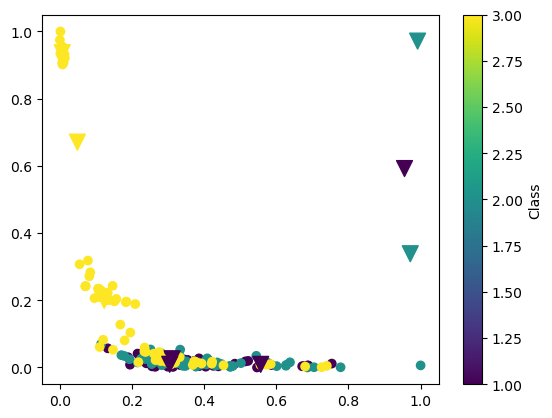

In [465]:
scatter = plt.scatter(at1, at2, c=classes)
plt.scatter(news_x, news_y, c=prediction, s=130, marker="v")
plt.colorbar(scatter, label='Class')
plt.show()

Acurácia

In [466]:
news_x = X[:, 0]
news_y = X[:, 1]
classes = y

news_points = list(zip(news_x, news_y))


prediction_acc = []
for new_point in news_points:
    prediction_acc.append(knn.predict([new_point]))

#plt.scatter(news_x, news_y, c=prediction_acc)
#plt.colorbar(scatter, label='Class')
#plt.show()


prediction_np = np.array(prediction_acc).reshape(np.array(prediction_acc).shape[0])
count = np.sum(prediction_np == classes)

print('Acurácia: ', count / prediction_np.shape[0])


Acurácia:  0.7682926829268293


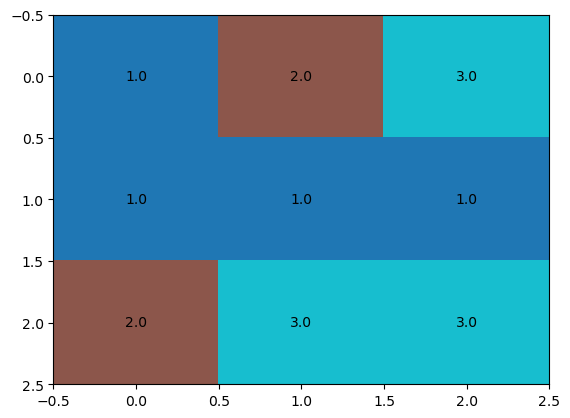

In [467]:
# Vetor de classes

prediction_list = []

# Número de classes
for p in prediction:
  prediction_list.append(p[0])
#print(prediction_list)

num_classes = len(set(prediction_list))

class_matrix = np.array(prediction_list).reshape(output_dim[0], output_dim[1])

# Plotar a matriz de cores com a classe
plt.imshow(class_matrix, cmap='tab10', aspect='auto')

# Adicionar o valor da classe em cada célula
for i in range(output_dim[0]):
    for j in range(output_dim[1]):
        plt.text(j, i, str(class_matrix[i, j]), ha='center', va='center', color='black')

#plt.colorbar(ticks=range(num_classes))
plt.show()

Matriz de Pesos Treinados

In [468]:
#print(weights.shape)
#plt.imshow(weights, cmap='hot', interpolation='nearest')
#plt.colorbar()
#plt.title('Pesos Treinados')
#plt.show()

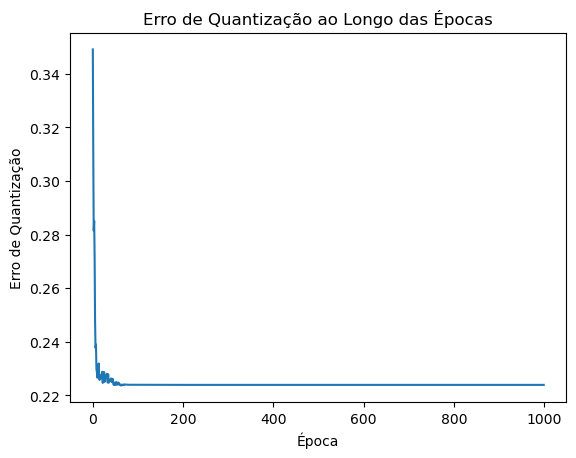

In [469]:
# Plotar o erro de quantização
plt.plot(quantization_errors)
plt.xlabel("Época")
plt.ylabel("Erro de Quantização")
plt.title("Erro de Quantização ao Longo das Épocas")
plt.show()